# Workshop 2: Exploratory Data Analysis (EDA) and Statistics

Exploratory Data Analysis (EDA) is a fundamental component of data science - when you've collected or been shared a dataset, EDA is one of the first things you should do. In this notebook we will go through the EDA example from the lectures with code, and then start applying EDA to an unseen dataset.

### EDA of a dataset of nanoparticles for brain delivery

We are going to start by studying the data from Yousfan et al. https://pubs.acs.org/doi/10.1021/acs.molpharmaceut.3c00880

A .pdf of the paper is also available on the github.

The first stage of any EDA is to look at the data - in this case the data is saved as an excel spreadsheet available in the github repository. I would suggest you look at the dataset in excel. The filename is: Nanoparticle_braindelivery_data.xlsx

This is supplementary table 2 from the publication, and represents the "final" dataset that the authors generated.

# Part 1: Looking at and understanding the data

#### Question 1

Comparing the dataset with the paper - particularly Figure 2 showing the Krona chart:
~
Which features (columns) of the data refer to properties of the drug, properties of the nanoparticles, and ways in which the nanoparticles were made?

(Double click this cell to edit it)

Drug properties:

Nanoparticle properties:

Nanoparticle manufacturing properties:

#### Question 2

Referring to the paper, what do the columns TMax, and AUC refer to? You will want to look closely at the methods section

(Double click this cell to edit it)

TMax:

AUC:

To start our EDA, we need to load the data into python. To do this we need to load a "library". Libraries allow you to load code and functions that other people have written for specific purposes. We are going to use the library called "pandas" to load data from a spreadsheet into python. Pandas is a library written for working with data in what are called "Dataframes" and is the most popular library for working with data in data science.

The way you load a library is with the `import` function. When you import a library you can give it a shorthand name so that you can use it in later functions.

Once you have loaded a library you dont need to reload it again in another code block - python "knows" it is there.

In [24]:
import pandas as pd   ## We load pandas and refer to it by pd. Now every time we use "pd" python knows we are referring to pandas

nanoparticle_data = pd.read_excel("./Nanoparticle_braindelivery_data.xlsx")   ## The read_excel function lets us load an excel file into a dataframe

In [8]:
nanoparticle_data ## We can look at the dataframe by typing its name

,Weight,logP,Solubility,Pgp,DrugCarrierRatio,Position,Comp1,Comp2,Size,Zeta,Cmax,AUC,Tmax,Release,Route
0,321.9930,3.01,0.132,no,1.000,core,chitosan,none,172.40,30.30,2.256,0.594,1.00,2.291667,IN
1,315.4800,4.70,0.009,no,1.000,core,PLGA,PEG,122.00,-21.28,1.400,1.879,1.00,1.142857,IN
2,284.7400,2.63,0.012,yes,0.156,core,PLGA,none,170.15,-15.00,1.306,1.361,0.50,2.500000,IN
3,171.2383,2.26,0.025,no,1.000,core,chitosan,none,153.00,-5.13,1.413,0.591,0.25,6.666667,IN
4,853.9060,3.20,0.006,yes,0.100,core,PLGA,none,136.78,-38.76,0.237,0.190,1.00,2.083333,IN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,326.1300,3.67,0.186,yes,1.000,core,solid lipid,phospholipids,96.70,21.30,3.000,1.400,3.00,1.370000,IV
129,348.3520,1.91,0.511,yes,0.120,core,phospholipids,solid lipid,196.80,-45.20,3.500,1.300,6.00,0.500000,IV
130,319.8500,3.61,0.030,no,0.300,core,PLGA,none,166.90,-32.12,1.200,1.400,1.00,0.670000,IV
131,315.4800,5.01,0.009,no,1.000,core,chitosan,none,75.37,25.35,0.589,0.620,1.00,8.500000,IV


In [9]:
nanoparticle_data.shape ## adding .shape to the end of the name of a dataframe tells you its dimensions

(133, 15)

In [16]:
nanoparticle_data.columns ## adding .columns tells us about the column names

Index(['Weight', 'logP', 'Solubility', 'Pgp', 'DrugCarrierRatio', 'Position',
       'Comp1', 'Comp2', 'Size', 'Zeta', 'Cmax', 'AUC', 'Tmax', 'Release',
       'Route'],
      dtype='object')

In [19]:
nanoparticle_data.describe() ## using .describe() we can look at the metrics for the numerical columns

,Weight,logP,Solubility,DrugCarrierRatio,Size,Zeta,Cmax,AUC,Tmax,Release
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,319.045544,2.769361,0.159267,0.284526,147.688120,-8.941429,1.112105,1.142068,2.257331,5.277248
std,92.970825,1.238233,0.220841,0.343883,71.730265,25.376764,1.075297,1.132456,2.285802,5.859029
min,146.143000,-2.560000,0.000000,0.007000,19.000000,-76.000000,0.008000,0.010000,0.028000,0.126250
25%,243.301000,1.910000,0.008000,0.100000,97.360000,-24.100000,0.197000,0.202000,1.000000,1.029412
50%,315.027000,2.930000,0.071000,0.100000,150.200000,-15.780000,0.882000,0.813000,1.000000,3.130000
75%,368.380000,3.620000,0.166000,0.300000,189.000000,-4.000000,1.589000,1.766000,4.000000,6.666667
max,853.906000,5.210000,1.000000,2.000000,400.000000,55.470000,5.522000,5.456000,12.000000,25.000000


In [21]:
nanoparticle_data.info() ## info tells you about all the columns - including the non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Weight            133 non-null    float64
 1   logP              133 non-null    float64
 2   Solubility        133 non-null    float64
 3   Pgp               133 non-null    object 
 4   DrugCarrierRatio  133 non-null    float64
 5   Position          133 non-null    object 
 6   Comp1             133 non-null    object 
 7   Comp2             133 non-null    object 
 8   Size              133 non-null    float64
 9   Zeta              133 non-null    float64
 10  Cmax              133 non-null    float64
 11  AUC               133 non-null    float64
 12  Tmax              133 non-null    float64
 13  Release           133 non-null    float64
 14  Route             133 non-null    object 
dtypes: float64(10), object(5)
memory usage: 15.7+ KB


#### Handling missing values

We can look for missing values using "isnull"

In [25]:
nanoparticle_data.isnull().sum() ## This tells us how many missing values there are

Weight              0
logP                0
Solubility          0
Pgp                 0
DrugCarrierRatio    0
Position            0
Comp1               0
Comp2               0
Size                0
Zeta                0
Cmax                0
AUC                 0
Tmax                0
Release             0
Route               0
dtype: int64

In [84]:
## In our case there are no missing values - but there are tools for dealing with them such as:

nanoparticle_data = nanoparticle_data.fillna(0) ## This will replace any missing value with a zero
nanoparticle_data = nanoparticle_data.dropna() ## This will remove any rows where there are missing values

#### Exploring individual variables

In [11]:
## You can look at individual columns in pandas by "slicing" the column using square brackets

nanoparticle_data["Weight"] ## get all the weights

0      321.9930
1      315.4800
2      284.7400
3      171.2383
4      853.9060
         ...   
128    326.1300
129    348.3520
130    319.8500
131    315.4800
132    321.9930
Name: Weight, Length: 133, dtype: float64

<Axes: xlabel='Weight', ylabel='Count'>

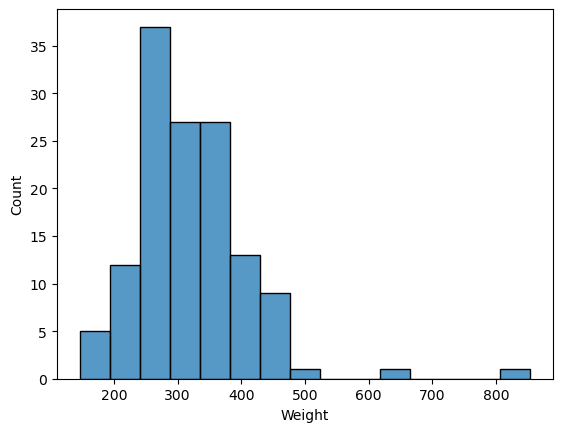

In [12]:
## Plotting using pandas is extremely easy. To do this we can use another set of libraries call matplotlib, and seaborn

import matplotlib.pyplot as plt
import seaborn as sns

## Most plots can be generated using a single line of code, and by giving the plotting function the slice of data you want to plot
sns.histplot(nanoparticle_data["Weight"]) ## histplot is a histogram

<Axes: xlabel='Weight', ylabel='Count'>

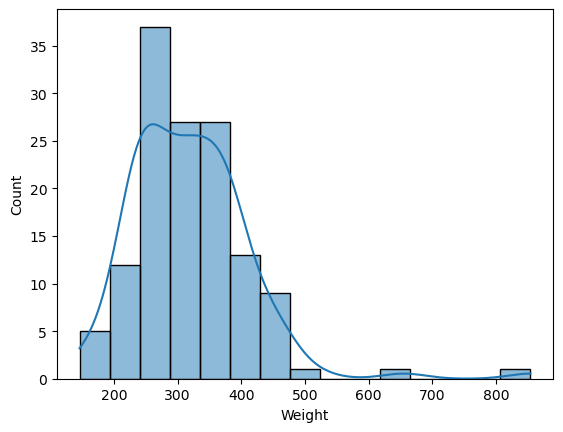

In [14]:
sns.histplot(nanoparticle_data["Weight"], kde = True) 
## Adding a "kde" refers to a Kernel density estimate: https://en.wikipedia.org/wiki/Kernel_density_estimation
## KDE is essentially a way of "smoothening" the distribution

### Question 3
Plot the distribution of the "release" column - what are ranges of release rates?

In [1]:
## insert code here

#### Boxplots
Here is a brief overview of what a boxplot actually shows from Newcastle University:
https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/data-presentation/box-and-whisker-plots.html

The below boxplot is for the column of drug molecular weights we looked at previously:

<Axes: ylabel='Weight'>

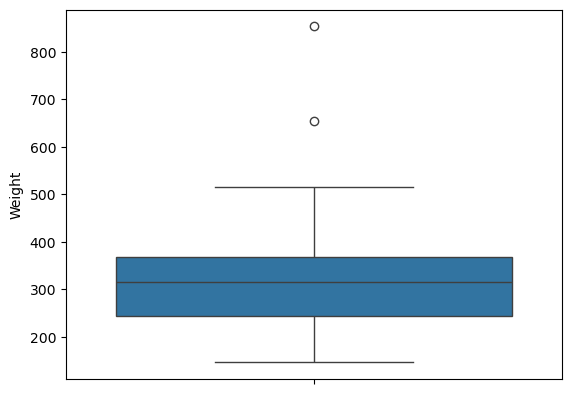

In [34]:
sns.boxplot(nanoparticle_data["Weight"]) ## A boxplot lets you see outliers and how "central" the mean is

#### Question 4

Make a boxplot and histogram for the column representing the AUC. What can you infer from the boxplot?

In [42]:
## Make a boxplot of the AUC

In [3]:
#What does this mean? (Double click to open)

### Categorical variables
Categorical values can be plotted as a "countplot" (bar chart), or pie chart

<Axes: xlabel='count', ylabel='Route'>

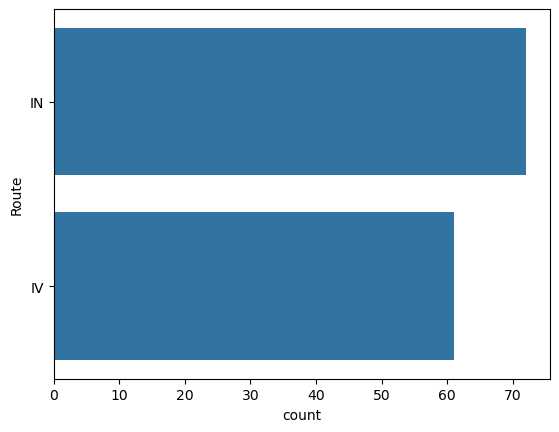

In [44]:
sns.countplot(nanoparticle_data["Route"])

Pie charts have some issues with visualisation: https://www.data-to-viz.com/caveat/pie.html

So the convention is to use a barchart, or other alternatives where the reader doesnt have to interpret angles

<Axes: xlabel='count', ylabel='Comp1'>

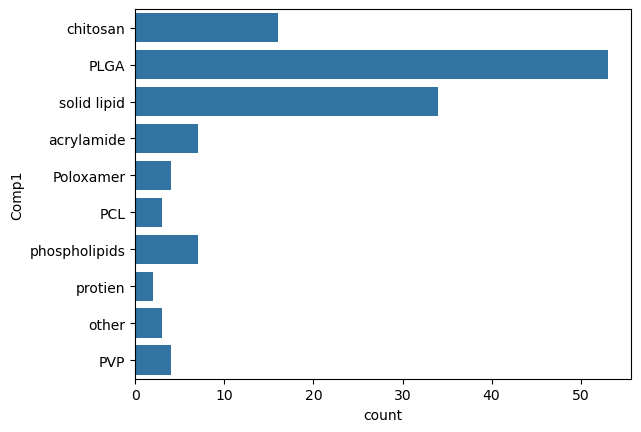

In [85]:
## Countplots do all the counting for you - you just give it the column you want it to total up
sns.countplot(nanoparticle_data["Comp1"])

Its very easy to make plots look nicer in seaborn - using "colour palettes".

These are detailed here: https://www.practicalpythonfordatascience.com/ap_seaborn_palette

The "Set2" colour palette is a good one for a range of visually distinct and mostly colourblind friendly colours

/var/folders/vv/0521912d5_j4wpw2lwprbrzw0000gn/T/ipykernel_79670/2133339612.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(nanoparticle_data["Comp1"], palette= "Set2", edgecolor = "k") ## Palette lets you choose a set of colours:


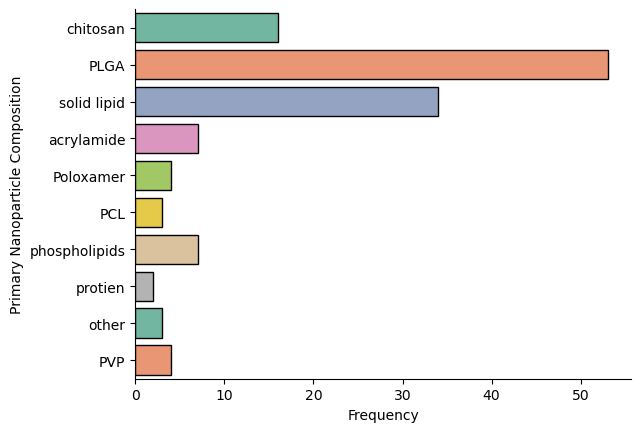

In [86]:
g = sns.countplot(nanoparticle_data["Comp1"], palette= "Set2", edgecolor = "k") ## Palette lets you choose a set of colours: 

## We set the x and y labels
g.set_xlabel("Frequency")
g.set_ylabel("Primary Nanoparticle Composition")

## We remove the black lines on the top and right
sns.despine()

### Exploring variable combinations

Plotting combinations of variables is a bit more tricky, but can be done fairly easily with seaborn.

For both boxplots and barplots - you give the function the X and the Y you want it to plot from the dataframe.

/var/folders/vv/0521912d5_j4wpw2lwprbrzw0000gn/T/ipykernel_30845/1071191817.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = nanoparticle_data["Route"], y = nanoparticle_data["Cmax"], palette = "Set2")#, linewidth = 1, edgecolor = "k")


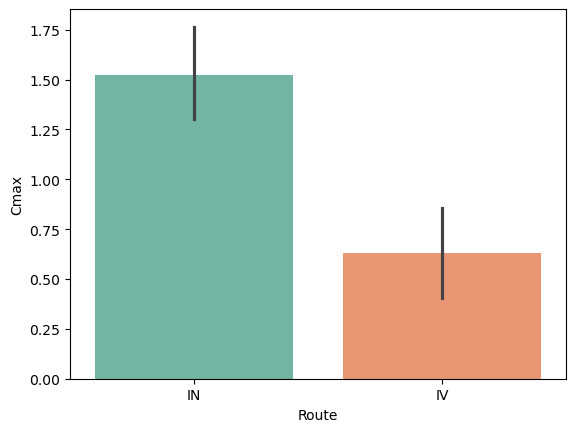

In [63]:
## Here we compare delivery route to Cmax - the maximal concentration of drug in the brain

g = sns.barplot(x = nanoparticle_data["Route"], y = nanoparticle_data["Cmax"], palette = "Set2")#, linewidth = 1, edgecolor = "k")

/var/folders/vv/0521912d5_j4wpw2lwprbrzw0000gn/T/ipykernel_30845/1671947482.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = nanoparticle_data["Position"], y = nanoparticle_data["Release"], palette = "Set2")#, linewidth = 1, edgecolor = "k")


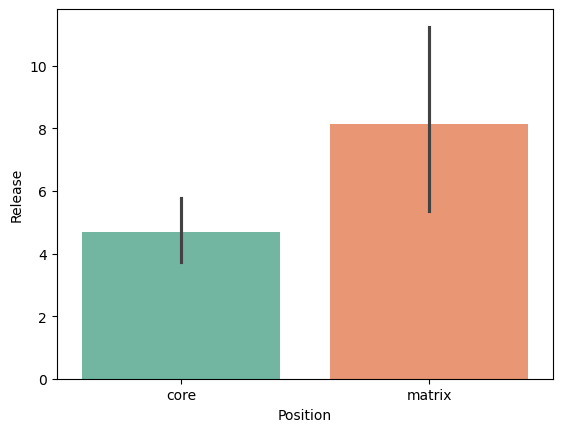

In [65]:
## Here we compare drug position in the particle to release rate

g = sns.barplot(x = nanoparticle_data["Position"], y = nanoparticle_data["Release"], palette = "Set2")#, linewidth = 1, edgecolor = "k")

We can compare numerical variables with a scatterplot - seaborn has a "jointplot" which automatically plots the scatter, along with the histograms for two variables

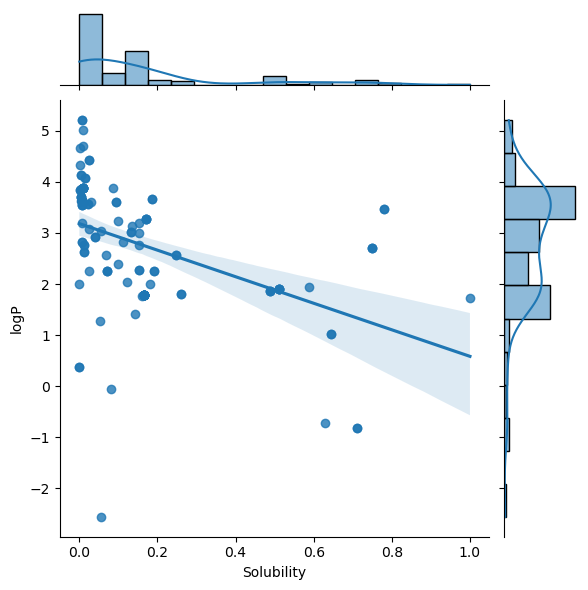

In [76]:
sns.jointplot(x = nanoparticle_data["Solubility"], y = nanoparticle_data["logP"], kind = "reg")

In this case we can see that the Solubility values are not normally distributed, and the correlation might be better with a log-scaled plot. We can convert the data to be log scaled using a library called "numpy" (NUMerical PYthon)

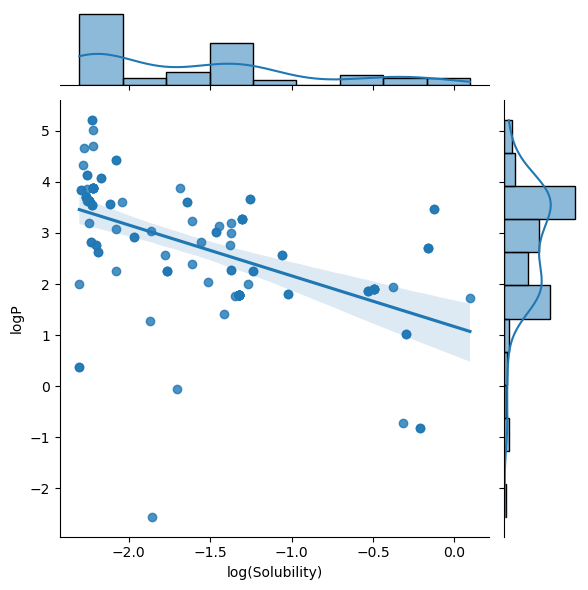

In [83]:
import numpy as np ## We load numpy

## This code makes a new column called "log(Solubility)", which is the log of the Solubility column
nanoparticle_data["log(Solubility)"] = np.log(nanoparticle_data["Solubility"]+0.1) ## Why might we add 0.1 to the values?

## We replot the jointplot with the logged data
g = sns.jointplot(x = nanoparticle_data["log(Solubility)"], y = nanoparticle_data["logP"], kind = "reg")


In this case we havent actually improved anything by logging the Solubility.


Its worth thinking about the chemistry/biology implications of some of these comparisons.

#### Question 5

See if you can use python to plot the distributions of all the numerical columns in the data - this will require you to first make a list of all the numerical columns, and then make a series of plots. Use an LLM/Chat GPT to help you and see if you can understand what it suggests

In [84]:
## Insert code here

### Large scale comparisons

Finally - seaborn and matplotlib makes it easy to compare loads of different sets of features

In [88]:
## We first need to select only the numerical columns from the data
nanoparticle_data_numeric = nanoparticle_data.select_dtypes("number")

nanoparticle_data_numeric.head()

,Weight,logP,Solubility,DrugCarrierRatio,Size,Zeta,Cmax,AUC,Tmax,Release
0,321.9930,3.01,0.132,1.000,172.40,30.30,2.256,0.594,1.00,2.291667
1,315.4800,4.70,0.009,1.000,122.00,-21.28,1.400,1.879,1.00,1.142857
2,284.7400,2.63,0.012,0.156,170.15,-15.00,1.306,1.361,0.50,2.500000
3,171.2383,2.26,0.025,1.000,153.00,-5.13,1.413,0.591,0.25,6.666667
4,853.9060,3.20,0.006,0.100,136.78,-38.76,0.237,0.190,1.00,2.083333


In [89]:
## The .corr() function performs the pairwise correlation of all the columns
correlation = nanoparticle_data_numeric.corr()

correlation

,Weight,logP,Solubility,DrugCarrierRatio,Size,Zeta,Cmax,AUC,Tmax,Release
Weight,1.000000,0.222075,-0.233616,-0.061465,0.031815,0.004323,-0.043763,0.015252,-0.222499,0.041832
logP,0.222075,1.000000,-0.463597,-0.009289,-0.020721,-0.118702,-0.064663,-0.061787,-0.067441,-0.069944
Solubility,-0.233616,-0.463597,1.000000,-0.058083,-0.003960,0.122148,0.049273,0.015700,0.082684,-0.137678
DrugCarrierRatio,-0.061465,-0.009289,-0.058083,1.000000,0.054887,0.110693,0.089733,-0.052420,0.023223,0.024454
Size,0.031815,-0.020721,-0.003960,0.054887,1.000000,0.225240,0.061031,0.058689,-0.009364,-0.091923
Zeta,0.004323,-0.118702,0.122148,0.110693,0.225240,1.000000,0.199074,0.160696,0.141420,0.057433
Cmax,-0.043763,-0.064663,0.049273,0.089733,0.061031,0.199074,1.000000,0.678048,-0.102405,-0.163615
AUC,0.015252,-0.061787,0.015700,-0.052420,0.058689,0.160696,0.678048,1.000000,-0.008483,-0.189255
Tmax,-0.222499,-0.067441,0.082684,0.023223,-0.009364,0.141420,-0.102405,-0.008483,1.000000,-0.042462
Release,0.041832,-0.069944,-0.137678,0.024454,-0.091923,0.057433,-0.163615,-0.189255,-0.042462,1.000000


<Axes: >

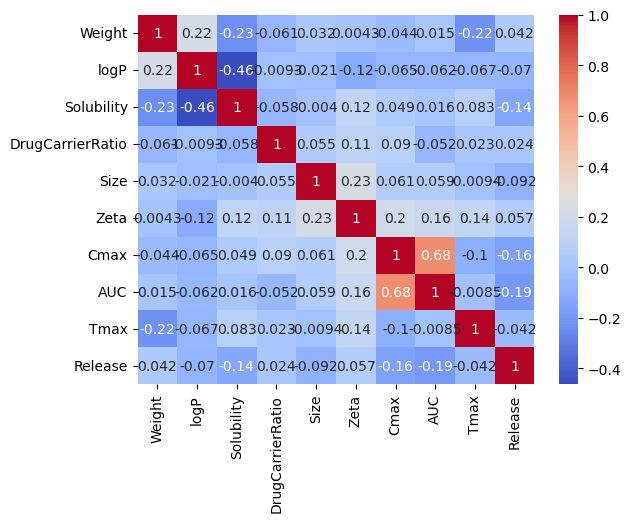

In [90]:
## We can then pass the correlation to the heatmap plot
sns.heatmap(correlation, annot= True, cmap="coolwarm")

<Axes: >

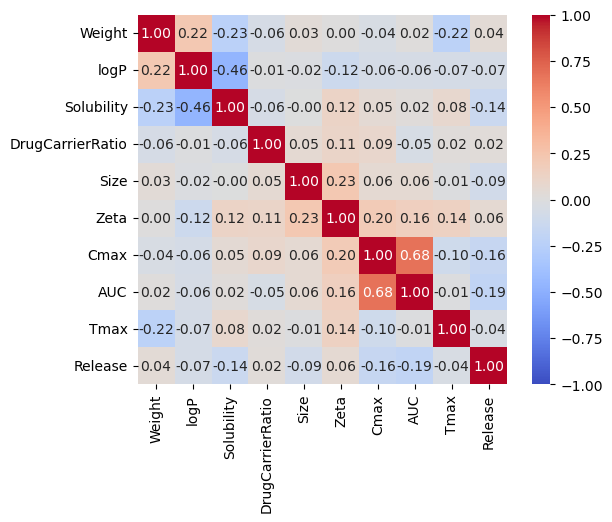

In [91]:
## We can adjust the plot to make sure the colours go from -1 to 1
sns.heatmap(correlation, annot= True, cmap="coolwarm", square = True, fmt=".2f", vmin = -1, vmax = 1)

Seaborn also has a "pairplot" graph that will do a pairwise comparison for every pair of columns

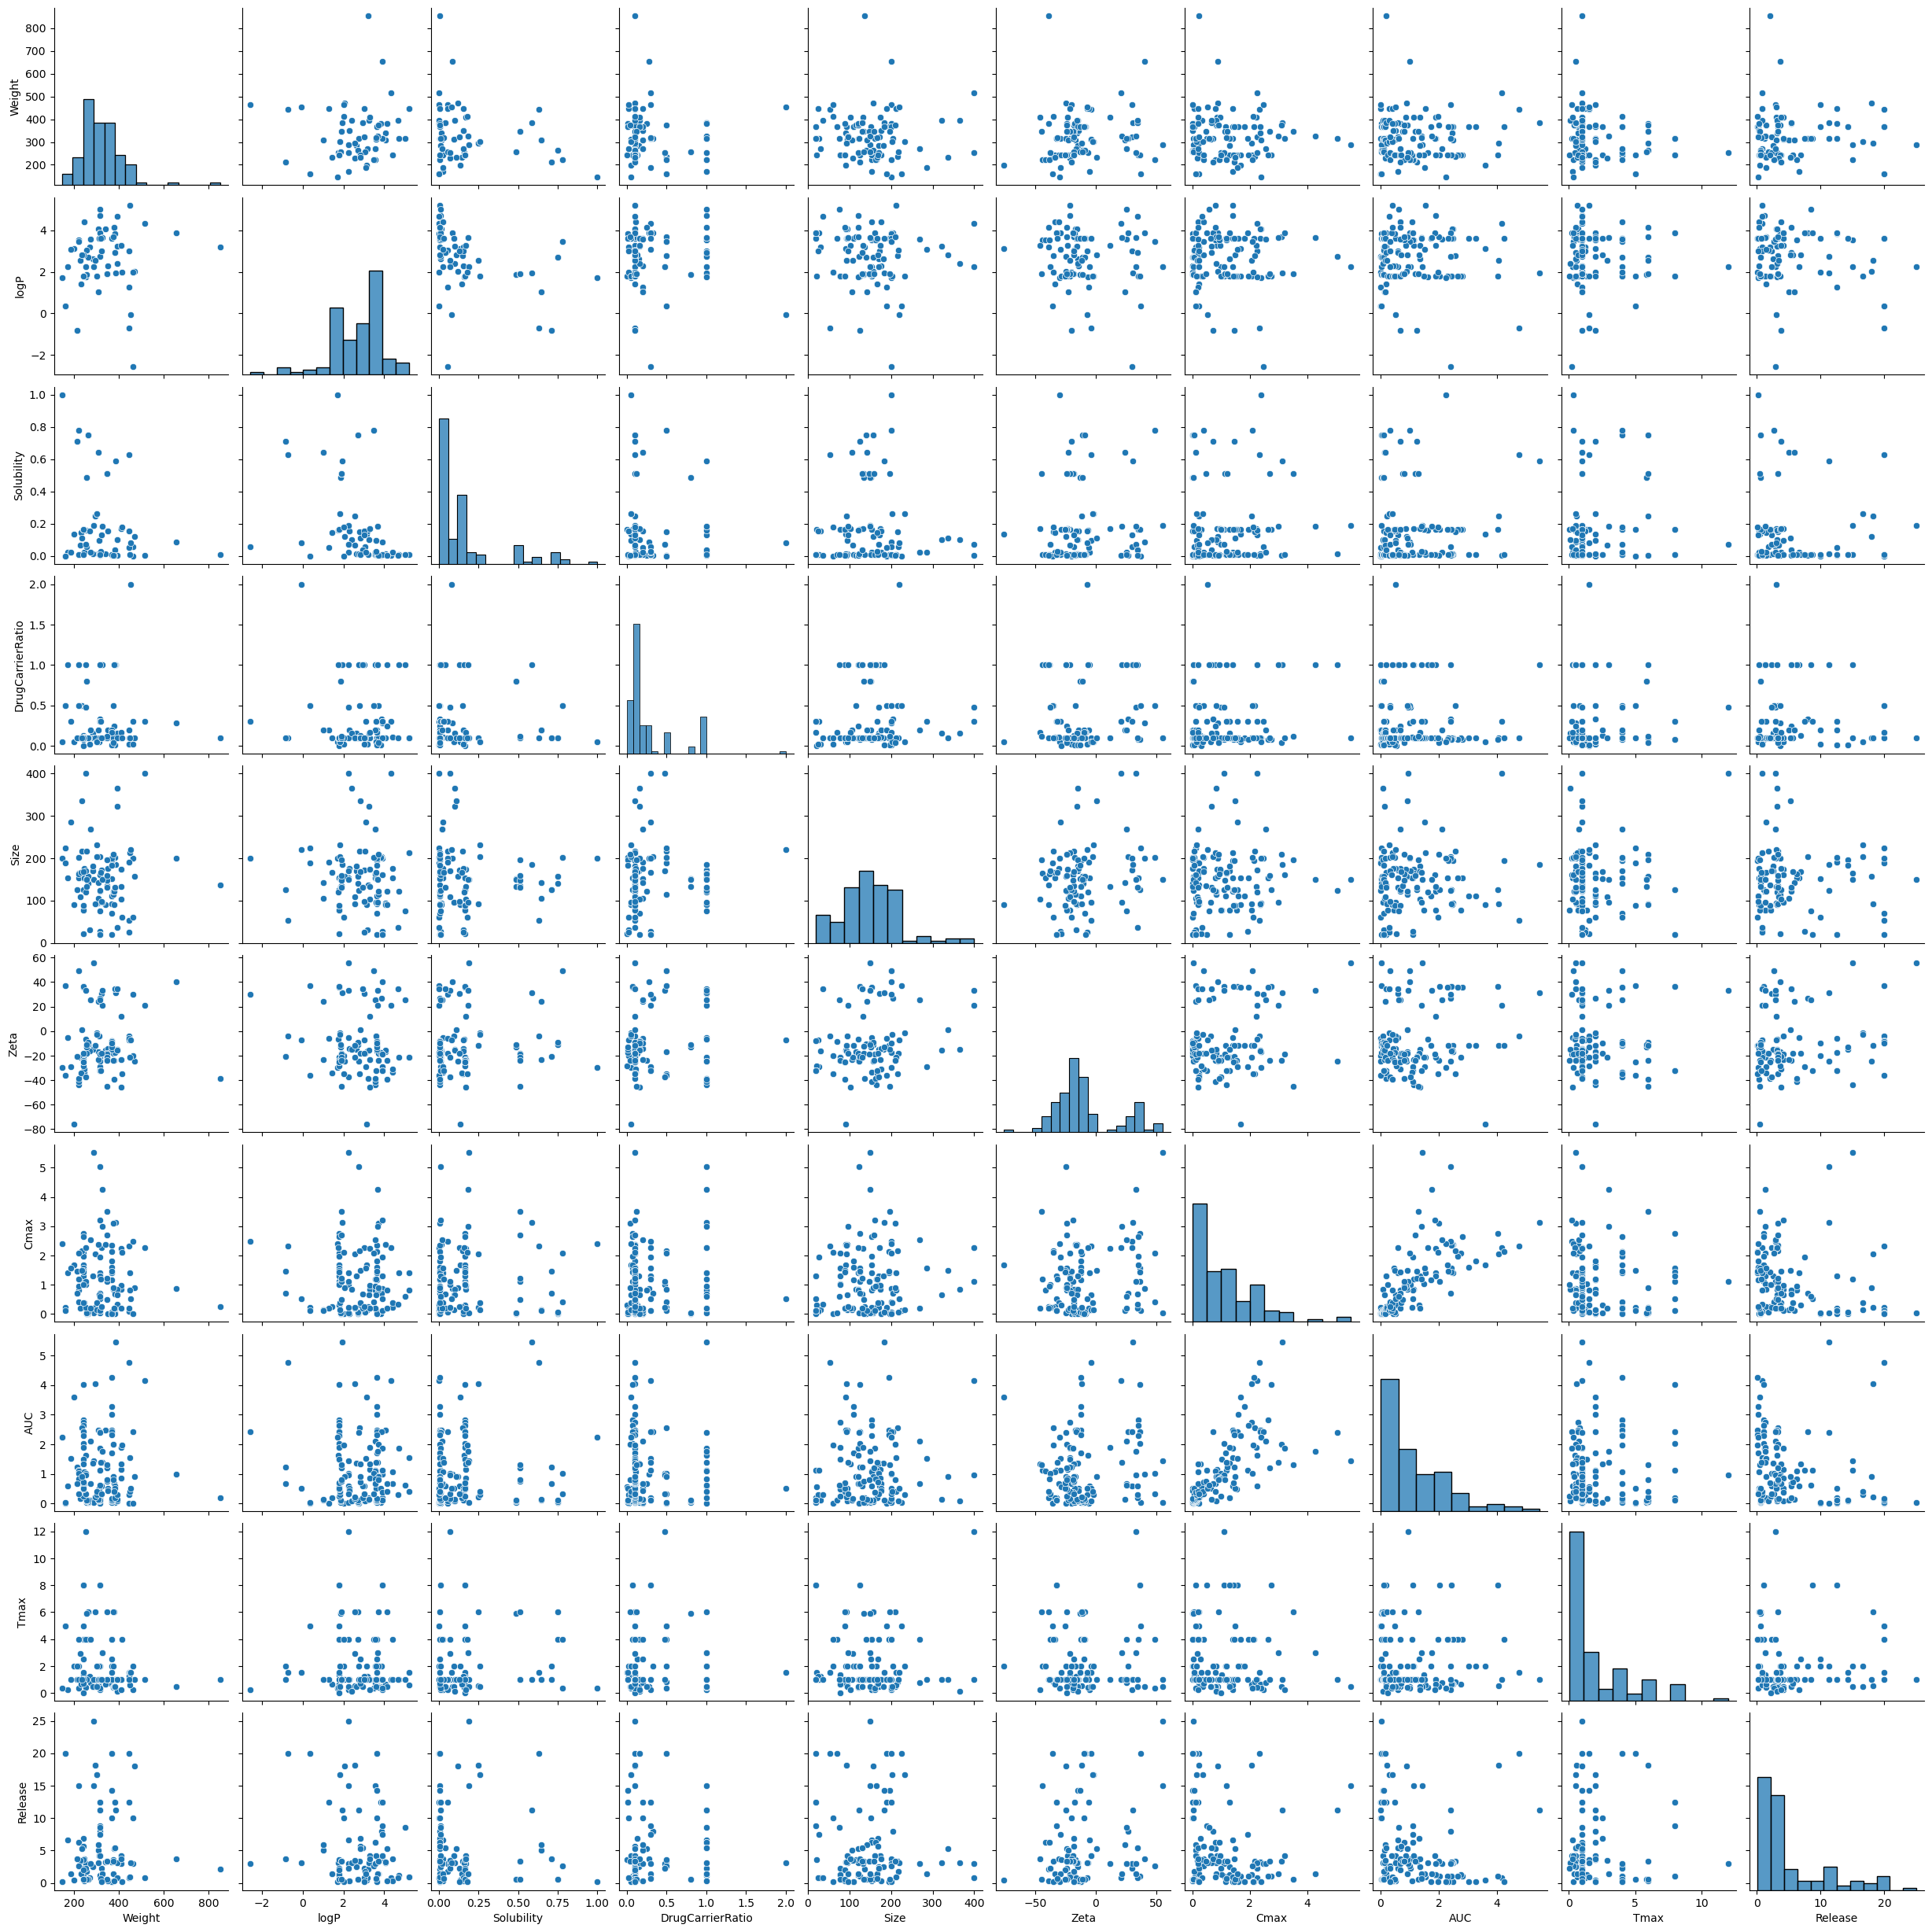

In [92]:
sns.pairplot(nanoparticle_data_numeric)

# Part 2: Applying Statistics

### Applying statistical tests

Statistical tests in python are extremely easy - we generally use a library (for example there is a library called "stats"), and for almost all statistical tests, they are as simple as passing your data into the function for calculating a p-value.

In [2]:
list1 = [4,5,5,4,5,4,3,6,5,4]
list2 = [5,5,5,6,7,6,5,4,5,6]

In [3]:
from scipy import stats

## We literally just pass our data into the function as two lists to compare
stats.ttest_ind(list1, list2)

TtestResult(statistic=-2.377217447079185, pvalue=0.028737783493709732, df=18.0)

Above we have applied a students independent t-test (ttest_ind) to the two list above, and the output is printed below. Our pvalue for this anaylsis is 0.029

In [5]:
## If you run the function equal to multiple variables, it will assign the results of the function to the variable in order
stat, pvalue = stats.ttest_ind(list1, list2)

Compared to the previous implementation - we have now assigned "stat" and "pvalue" to the t-statistic, and p-value calcualted by the function

In [6]:
print(pvalue)

0.028737783493709732


### Applying statistical tests to a dataframe

Applying statistics to a dataframe is just as easy if the data is in eg. different columns. 
The problem is when you need to calculate statistics for one column split by another (eg. for comparing a Control vs Drug treatment regime)

I'll show you have to apply statistics to a dataframe with a simple example:

Below we make a dataframe imagining it contains patient data for a set of responses to some treatment in a clinical trial.

We have two groups of patients, control and treatment, and we have a response variable. We want to know if the response is different between the two groups

In [42]:
import pandas as pd

## This makes a dataframe for us with 3 columns, with group types
data = {
    'group':       ['Control']*5 + ['Treatment']*5,
    'patient_id':  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'response_variable': [22.1, 23.4, 21.6, 24.0, 20.9, 27.8, 29.1, 24.4, 26.5, 28.2]
}

patient_data = pd.DataFrame(data)

In [43]:
patient_data

,group,patient_id,response_variable
0,Control,1,22.1
1,Control,2,23.4
2,Control,3,21.6
3,Control,4,24.0
4,Control,5,20.9
5,Treatment,6,27.8
6,Treatment,7,29.1
7,Treatment,8,24.4
8,Treatment,9,26.5
9,Treatment,10,28.2


If we want to compare the response_variable values between the treatment and control, we need to subset the data in pandas

In [46]:
## This lets us see if the 'group' column of a dataframe is equal to 'Control' - see how this lines up with the printed dataframe above
patient_data['group'] == 'Control'

0     True
1     True
2     True
3     True
4     True
5    False
6    False
7    False
8    False
9    False
Name: group, dtype: bool

In [47]:
## We can now use this to subset the dataframe into only samples where 'group' equals 'Control'
patient_data[patient_data['group'] == 'Control']

,group,patient_id,response_variable
0,Control,1,22.1
1,Control,2,23.4
2,Control,3,21.6
3,Control,4,24.0
4,Control,5,20.9


In [48]:
## We can now add to the above function to get only the 'response_variable' values - i.e the variables we want
patient_data[patient_data['group'] == 'Control']['response_variable']

0    22.1
1    23.4
2    21.6
3    24.0
4    20.9
Name: response_variable, dtype: float64

These following lines of code look scary, but they are really just extracting the 'response_variable' values, for the Control and Treatment samples

In [49]:
control = patient_data[patient_data['group'] == 'Control']['response_variable']
treatment = patient_data[patient_data['group'] == 'Treatment']['response_variable']

In [50]:
treatment

5    27.8
6    29.1
7    24.4
8    26.5
9    28.2
Name: response_variable, dtype: float64

Which we can now pass on to the t-test function we used previously:

In [51]:
stats.ttest_ind(control, treatment)

TtestResult(statistic=-4.819315973414993, pvalue=0.0013225178906380428, df=8.0)

#### Question 6

Using the nanoparticle dataset, see if you can calculate if there is a difference between the release rates of nanoparticles delivered intravenously compared to those delivered intranasaly.

Make a plot of the data - does this make sense?

You will need to:

- Identify the columns in the nanoparticle dataframe that you want to study
- Extract the data for IN and IV delivery of the nanoparticles
- Apply the t-test
- Plot the data

In [21]:
## Insert your code here

### Applying more complex statistics - ANOVA

Below I will show you how to calculate results for an ANOVA test applied to the material of nanoparticle against nanoparticle size

https://datatab.net/tutorial/anova <- here is a good tutorial on what an ANOVA is if you havent encountered it before

/var/folders/vv/0521912d5_j4wpw2lwprbrzw0000gn/T/ipykernel_79670/875025725.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(x = nanoparticle_data["Comp1"], y = nanoparticle_data["Size"], palette = "Set2")
/var/folders/vv/0521912d5_j4wpw2lwprbrzw0000gn/T/ipykernel_79670/875025725.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation = 45)


[Text(0, 0, 'chitosan'),
 Text(1, 0, 'PLGA'),
 Text(2, 0, 'solid lipid'),
 Text(3, 0, 'acrylamide'),
 Text(4, 0, 'Poloxamer'),
 Text(5, 0, 'PCL'),
 Text(6, 0, 'phospholipids'),
 Text(7, 0, 'protien'),
 Text(8, 0, 'other'),
 Text(9, 0, 'PVP')]

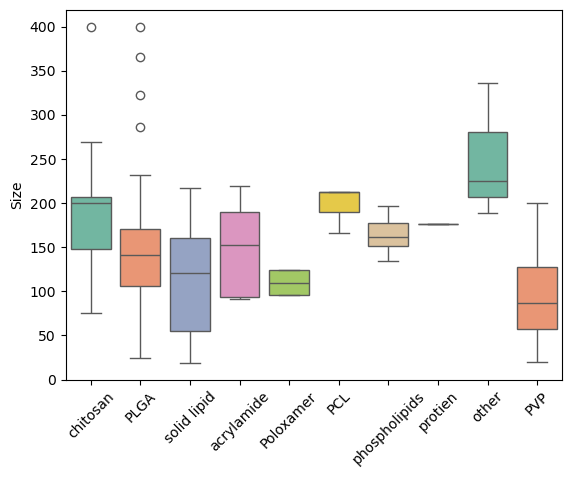

In [63]:
## This is what our data looks like
import seaborn as sns

## We pass the data to the boxplot function in seaborn
g = sns.boxplot(x = nanoparticle_data["Comp1"], y = nanoparticle_data["Size"], palette = "Set2")

## We set the xlabel to nothing
g.set_xlabel("")

## We rotate the x tick labels so they dont clash
g.set_xticklabels(g.get_xticklabels(), rotation = 45)

In [52]:
from scipy.stats import f_oneway # f_oneway is a one way ANOVA test

columns_for_anova = nanoparticle_data[["Comp1", "Size"]] ## Here we get only the columns we want to apply the anova to

## This complex line of code just breaks the data into the different groups - which you can see from the print statement
groups = [group["Size"].values for value, group in columns_for_anova.groupby("Comp1")] 

print(groups)

[array([212.2, 166.7, 212.2]), array([122.  , 170.15, 136.78, 195.  , 125.4 ,  91.  , 110.  , 110.  ,
       153.2 ,  78.1 , 153.2 , 195.  , 125.4 , 125.4 , 195.  , 153.2 ,
       200.  , 125.4 ,  78.1 , 110.  ,  78.1 , 182.  , 124.8 , 154.  ,
       170.63, 400.  ,  30.04, 201.5 ,  24.98,  60.  , 201.5 , 141.  ,
       133.9 , 157.  , 365.3 , 151.  , 158.  , 150.  , 106.  , 322.6 ,
       142.  ,  78.  , 232.4 , 170.63,  89.67, 203.  ,  78.  ,  89.  ,
       124.8 ,  89.  , 286.1 , 166.9 ,  97.36]), array([ 20. ,  70. , 200. , 103.4]), array([124.15,  95.7 , 124.15,  95.7 ]), array([ 94.28,  91.23,  92.46, 152.  , 197.  , 184.  , 220.  ]), array([172.4 , 153.  , 200.  , 400.  , 184.3 , 216.5 , 204.  , 200.  ,
       269.3 , 132.7 , 201.2 , 131.08, 131.08, 201.2 , 269.3 ,  75.37]), array([189., 225., 336.]), array([165.2, 154.2, 162.1, 190. , 134.7, 148.7, 196.8]), array([176., 176.]), array([ 92.28,  53.  , 209.5 , 161.  , 120.6 , 149.9 , 167.7 , 174.9 ,
        19.04,  26.45, 115.1 ,

In [53]:
## running the ANOVA is just a case of giving the group to the f_oneway function:
f_oneway(*groups)

F_onewayResult(statistic=3.3596543728929507, pvalue=0.0010359847528356237)

This tells use that there is a significant different in the data, but not _where_ it is

To understand where the difference is we need to apply a "post hoc test". The most common is the Tukey test

In [55]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result = pairwise_tukeyhsd(nanoparticle_data["Size"], nanoparticle_data["Comp1"])

In [56]:
print(tukey_result)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1        group2     meandiff p-adj    lower    upper   reject
----------------------------------------------------------------------
          PCL          PLGA   -47.759 0.9697 -175.0826  79.5646  False
          PCL           PVP  -98.6833 0.6415  -262.543  65.1763  False
          PCL     Poloxamer  -87.1083  0.786  -250.968  76.7513  False
          PCL    acrylamide  -49.7519 0.9855 -197.8004  98.2966  False
          PCL      chitosan    -0.694    1.0 -135.6741 134.2861  False
          PCL         other   52.9667 0.9932 -122.2066   228.14  False
          PCL phospholipids  -32.5048 0.9994 -180.5532 115.5437  False
          PCL       protien  -21.0333    1.0  -216.883 174.8164  False
          PCL   solid lipid  -82.8957 0.5538 -212.1111  46.3197  False
         PLGA           PVP  -50.9243 0.8993   -162.17  60.3213  False
         PLGA     Poloxamer  -39.3493 0.9795  -150.595  71.8963  False
      

Looking through the printout above you can see only two pairs have "True" for whether you reject the null hypothesis (and therefore accept the alternative hypothesis). These are the chitosan/solid lipid, and other/solid lipid pairs.

#### Question 7

Apply the same type of analysis to the polymer type ("Comp1") compared to the release rate of drug. You will need to:

- Plot the boxplot of comp1 vs release
- Calculate the ANOVA
- Perform the Tukey post-hoc test

In [64]:
## Insert your code here

### Applying more complex statistics - Correlation analysis

Correlation analysis is extremely easy - you just pass two lists of numbers to the pearsons or spearmans rank correlation function.

To learn more about these two tests if you havent come across them previously:
https://www.analyticsvidhya.com/blog/2021/03/comparison-of-pearson-and-spearman-correlation-coefficients/ 

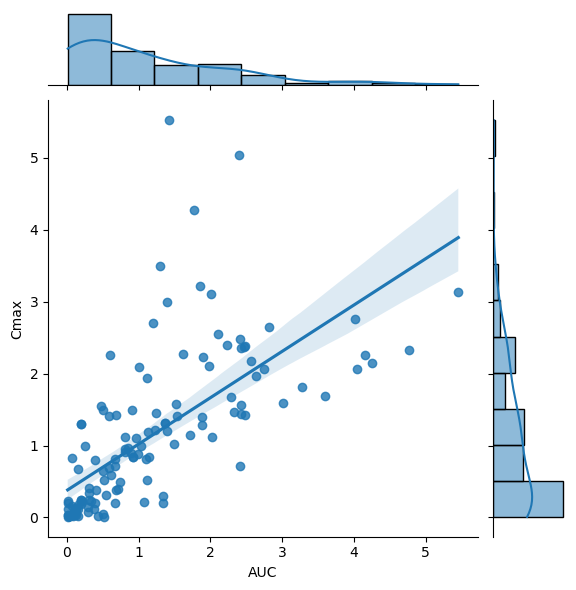

In [67]:
## The jointplot in seaborn can be used to plot the distributions of the data and their correlation
sns.jointplot(x = nanoparticle_data["AUC"], y = nanoparticle_data["Cmax"], kind = "reg")

Given both of these are clearly non-normally distributed, we would use the spearmans rank correlation

In [69]:
from scipy.stats import spearmanr ## We load the spearmans rank test (for pearsons correlation use: pearsonr)

## Give the two columns to the spearmanr function and it prints out our correlation coefficient and pvalue
spearmanr(nanoparticle_data["AUC"], nanoparticle_data["Cmax"])

SignificanceResult(statistic=0.8376831148565932, pvalue=3.2104566560571485e-36)

#### Question 8

Compare the Size and Zeta potential of the collected samples, what do you find?

In [93]:
# Insert your code here

## Bonus Questions:

#### Question 9

Does the nanoparticle having a mixed makeup (more than one composition) effect drug release, Cmax, or the Zeta potential? Are these difference statistically significant

#### Question 10

How does the release rate of the drug from nanoparticles change based on the primary material used? If you wanted to further study the material types (polymer, lipid, sugar) and how they change release, how might you do this? See if you can perform this analysis